<a href="https://colab.research.google.com/github/NITIN9694/TensorFlow-Learning/blob/main/09_NLP_in_tensorflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introducation to NLP Fundamental in TensorFlow

NLP has goal driving infromation out of natural language (could be sequence of text or speech)

Another term of NLP problem is sequence to sequence problem

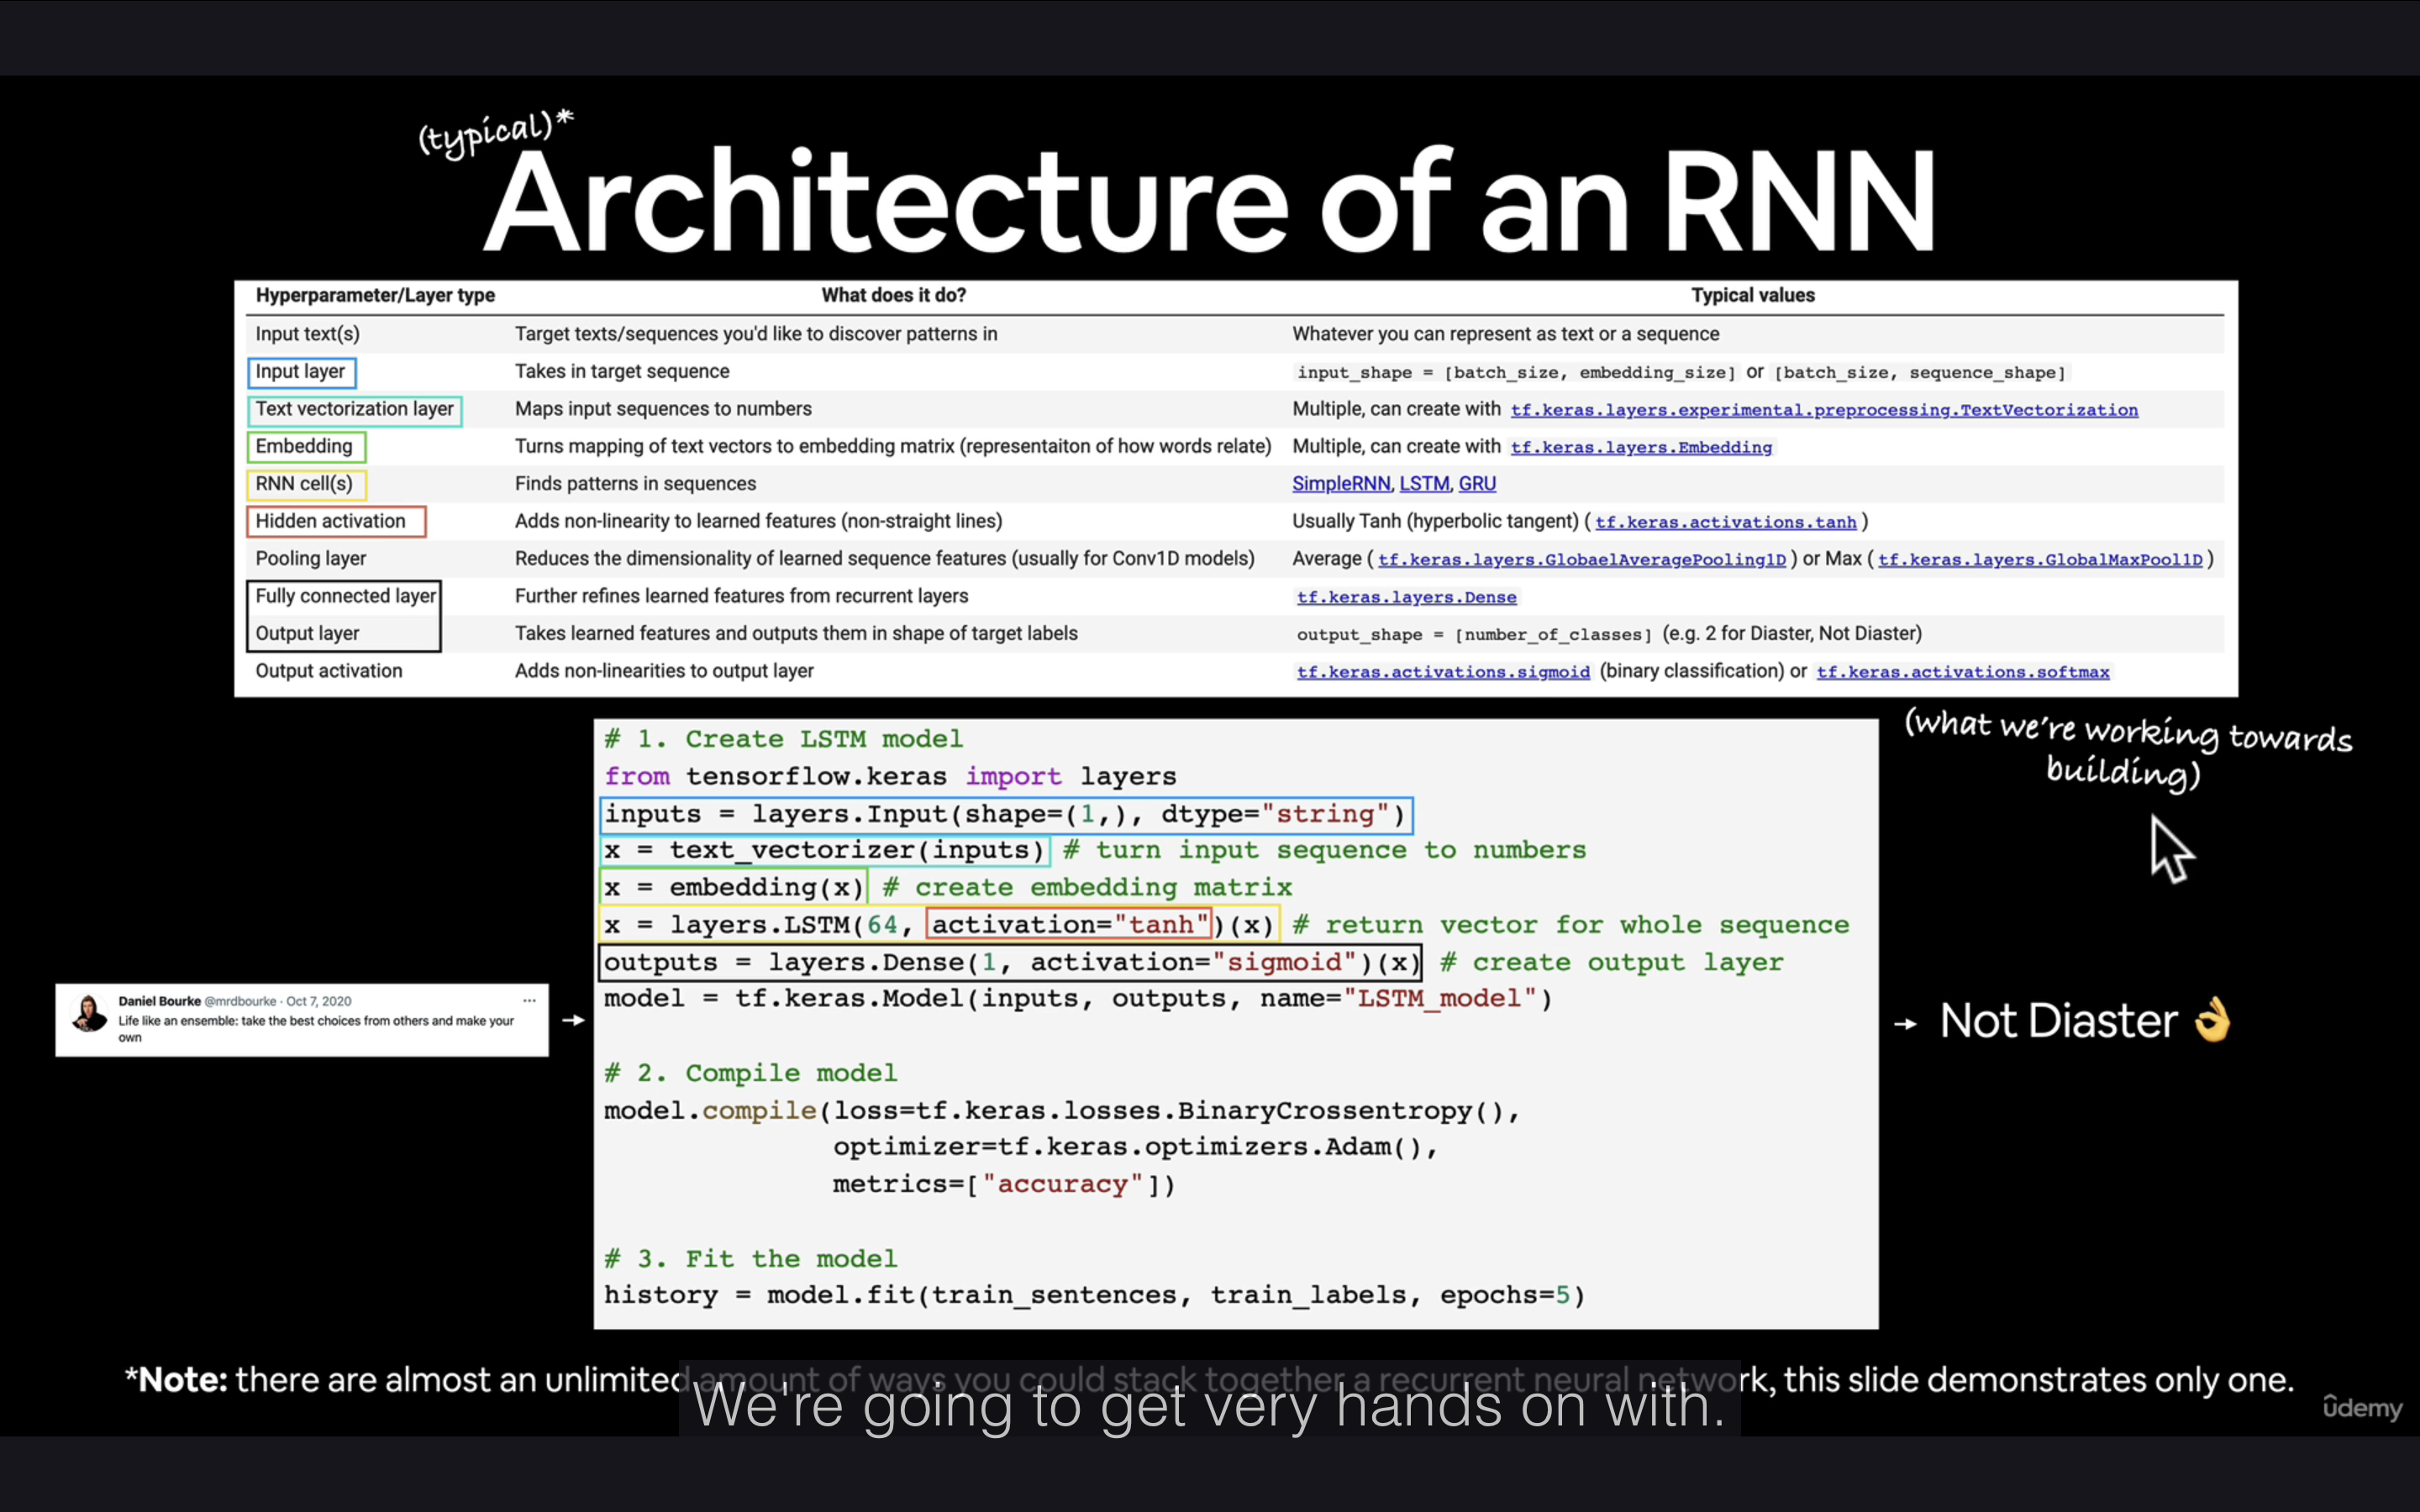

##Check the GPU


In [3]:
!nvida-smi -L

/bin/bash: line 1: nvida-smi: command not found


In [4]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2025-12-26 07:09:12--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-12-26 07:09:12 (101 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys


In [6]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

--2025-12-26 07:09:12--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2025-12-26 07:09:12 (137 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [7]:
# Unzip data
unzip_data("nlp_getting_started.zip")

##Visulazing the dataset

In [8]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
#shuffel training dataframe
train_def_shuffel = train_df.sample(frac = 1,random_state = 42)
train_def_shuffel.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [10]:
#what does the test dataframe look like
test_def_shuffel = test_df.sample(frac = 1,random_state = 42)
test_def_shuffel.head()

,id,keyword,location,text
2406,8051,refugees,NaN,Refugees as citizens - The Hindu http://t.co/G...
134,425,apocalypse,Currently Somewhere On Earth,@5SOStag honestly he could say an apocalypse i...
411,1330,blown%20up,Scout Team,If you bored as shit don't nobody fuck wit you...
203,663,attack,NaN,@RealTwanBrown Yesterday I Had A Heat Attack ?...
889,2930,danger,Leeds,The Devil Wears Prada is still one of my favou...


In [11]:
#how many total samoles?
len(train_df) , len(test_df)

(7613, 3263)

In [12]:
#lets visiualize some random trainig example
import random
random_index = random.randint(0,len(train_df)-5) #create random index not higher then the total index
for row in train_def_shuffel[["text","target"]][random_index:random_index+5].itertuples():
  _,text, target = row
  print(target,"",("real disaster" if target > 0 else "not real disaster"))
  print(f"Text:\n{text}\n")
  print("---\n")

0  not real disaster
Text:
Just had a heart attack because I thought my goat was dead. ???? don't worry Rocket is okay. ??

---

1  real disaster
Text:
FreeBesieged: .MartinMJ22 YouGov Which '#Tory landslide' ... you can't POSSIBLY mean the wafer-thin majority of #GÛ_ http://t.co/2q3fuEReY5

---

1  real disaster
Text:
Video:  Fire burns two apartment buildings and blows up car in Manchester http://t.co/5BGcw3EzB5

---

1  real disaster
Text:
Men escape car engulfed in flames in Parley's Canyon crews investigating cause - http://t.co/tFan6qq2Ys http://t.co/rAkwWritPo

---

0  not real disaster
Text:
FedEx no longer will ship potential bioterror pathogens - Atlanta Business Chronicle http://t.co/YLLQJljiIQ

---



##Split data into training and validation sets




In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#Use train and test  split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_def_shuffel["text"].to_numpy(),
                                                                            train_def_shuffel["target"].to_numpy(),
                                                                            test_size = 0.1,
                                                                            random_state=42
                                                                            )

In [15]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

#Converting Text into Numbers

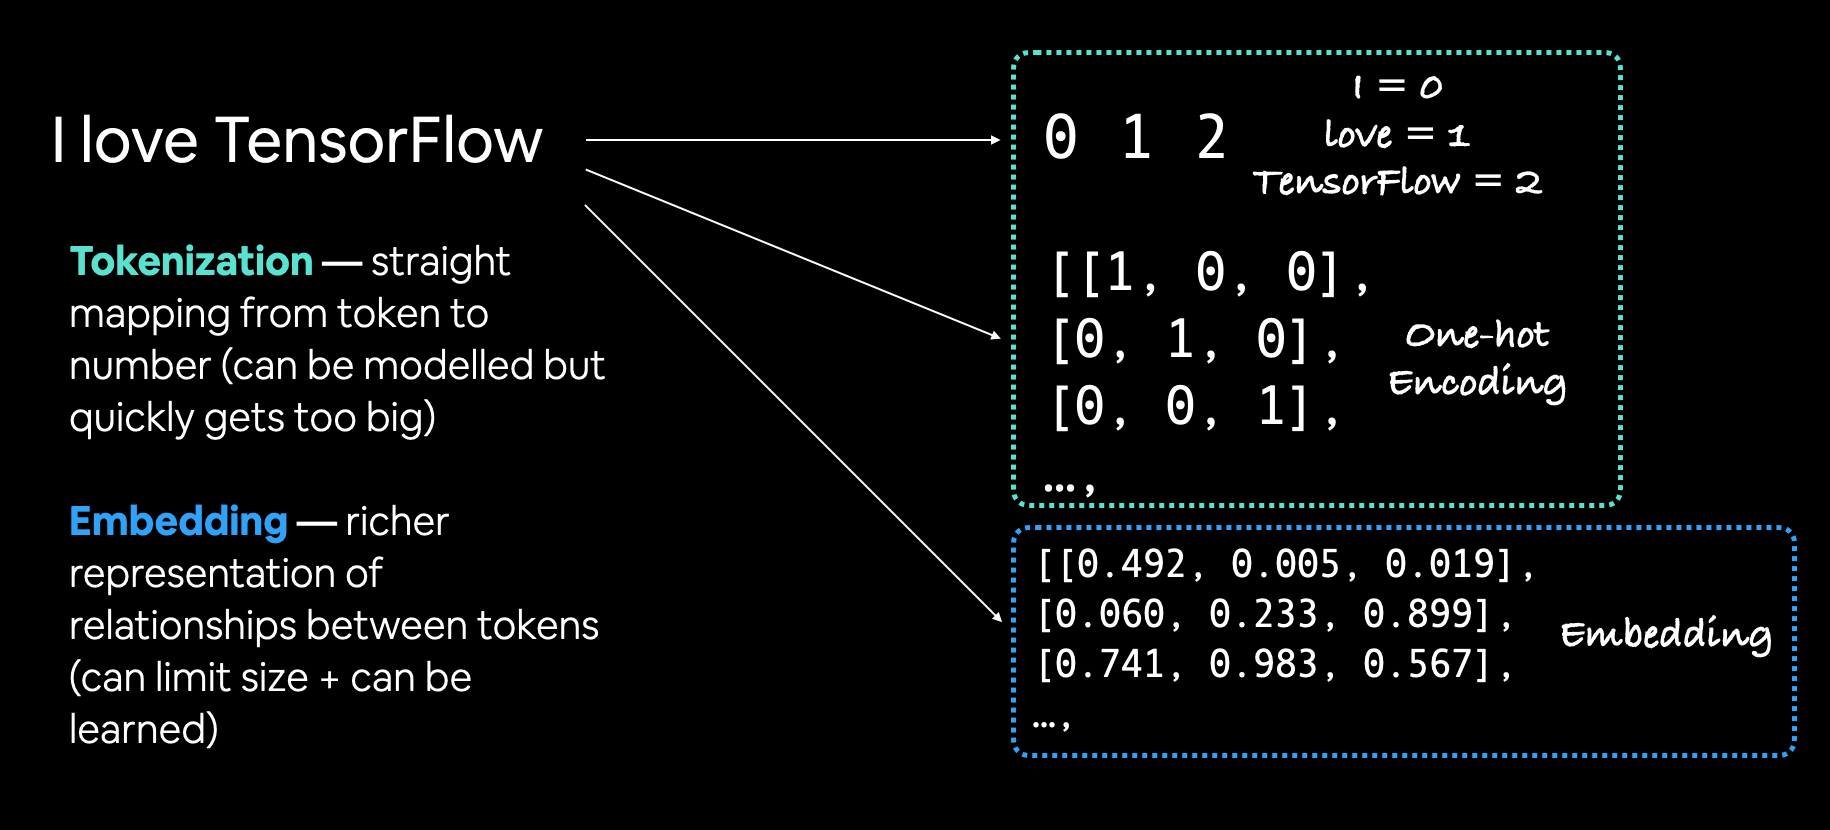



*   Tokenization - A straight mapping from word or character or sub-word to a numerical value. There are three main levels of tokenization: Using word-level tokenization with the sentence "I love TensorFlow" might result in "I" being 0, "love" being 1 and "TensorFlow" being 2. In this case, every word in a sequence considered a single token. Character-level tokenization, such as converting the letters A-Z to values 1-26. In this case, every character in a sequence considered a single token. Sub-word tokenization is in between word-level and character-level tokenization. It involves breaking invidual words into smaller parts and then converting those smaller parts into numbers. For example, "my favourite food is pineapple pizza" might become "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". After doing this, these sub-words would then be mapped to a numerical value. In this case, every word could be considered multiple tokens.
*   Embeddings - An embedding is a representation of natural language which can be learned. Representation comes in the form of a feature vector. For example, the word "dance" could be represented by the 5-dimensional vector [-0.8547, 0.4559, -0.3332, 0.9877, 0.1112]. It's important to note here, the size of the feature vector is tuneable. There are two ways to use embeddings: Create your own embedding - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as tf.keras.layers.Embedding) and an embedding representation will be learned during model training. Reuse a pre-learned embedding - Many pre-trained embeddings exist online. These pre-trained embeddings have often been learned on large corpuses of text (such as all of Wikipedia) and thus have a good underlying representation of natural language. You can use a pre-trained embedding to initialize your model and fine-tune it to your own specific task.

🤔 Question: What level of tokenzation should I use? What embedding should should I choose?

It depends on your problem. You could try character-level tokenization/embeddings and word-level tokenization/embeddings and see which perform best. You might even want to try stacking them (e.g. combining the outputs of your embedding layers using tf.keras.layers.concatenate).

If you're looking for pre-trained word embeddings, Word2vec embeddings, GloVe embeddings and many of the options available on TensorFlow Hub are great places to start.

🔑 Note: Much like searching for a pre-trained computer vision model, you can search for pre-trained word embeddings to use for your problem. Try searching for something like "use pre-trained word embeddings in TensorFlow".



#Text vectorization (tokenization)



In [16]:

train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [17]:

import tensorflow as tf
from tensorflow.keras.layers import  TextVectorization

#use default TextVectorization
text_vectorizer = TextVectorization(
    max_tokens = None, ##how many words in the vocabulary (all of the different words in your text)
    standardize = "lower_and_strip_punctuation",
    ngrams = None, #create group of n-words?
    split = "whitespace",
    output_mode = "int",# how to map tokens to numbers
    output_sequence_length = None,# how long should the output sequence of tokens be?
    #pad_to_max_token = True # Not valid if using max_tokens=None
)

In [18]:

#find the average number of token in the training tweets
round(sum([len(i.split()) for i in train_sentences] )/len(train_sentences))

15

In [19]:

# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(
    max_tokens = max_vocab_length,
    output_mode = "int",
    output_sequence_length = max_length
)

In [20]:

#fit the text vector to the training text
text_vectorizer.adapt(train_sentences)


In [21]:

random_sentence  = random.choice(train_sentences)
print(f"Oringal text:\n{random_sentence}\
      \n\n Vectorized version :"
      )
text_vectorizer([random_sentence])

Oringal text:
Cop pulls drunk driver to safety SECONDS before his car is hit by train. http://t.co/tHrhKHOGcUåÊ http://t.co/tZSZmF2qxE via @ViralSpell      

 Vectorized version :


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[2151, 2769, 1301,  900,    5,  992, 1599,  239,   79,  127,    9,
         244,   18,  119,    1]])>

In [22]:

# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")


Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', np.str_('the'), np.str_('a'), np.str_('in')]
Bottom 5 least common words: [np.str_('pages'), np.str_('paeds'), np.str_('pads'), np.str_('padres'), np.str_('paddytomlinson1')]


##Creating an Embedding using an Embedding Layer
The powerful thing about an embedding is it can be learned during training. This means rather than just being static (e.g. 1 = I, 2 = love, 3 = TensorFlow), a word's numeric representation can be improved as a model goes through data samples.

The main parameters we're concerned about here are:
*   input_dim - The size of the vocabulary (e.g. len(text_vectorizer.get_vocabulary()).
*  output_dim - The size of the output embedding vector, for example, a value of 100 outputs a feature vector of size 100 for each word.
* embeddings_initializer - How to initialize the embeddings matrix, default is "uniform" which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
* input_length - Length of sequences being passed to embedding layer.

In [23]:
from tensorflow.keras import layers
embedding = layers.Embedding(
    input_dim = max_vocab_length,
    output_dim = 128,
    embeddings_initializer="uniform", # default, intialize randomly
    input_length=max_length, # how long is each input
   name="embedding_1")




/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [24]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Fotoset: elanorofrohan: 10th December 2013 Green Carpet in Zurich for the Swiss Premiere of The Desolation... http://t.co/BQ3P7n7w06      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.0431425 ,  0.00334878,  0.04387981, ...,  0.01496125,
         -0.04255297, -0.03384408],
        [ 0.0431425 ,  0.00334878,  0.04387981, ...,  0.01496125,
         -0.04255297, -0.03384408],
        [-0.04544542, -0.03861203, -0.00028765, ...,  0.03853097,
          0.04695562,  0.00861372],
        ...,
        [ 0.00280624, -0.0287731 ,  0.04155074, ..., -0.00147519,
         -0.01444135, -0.04006395],
        [-0.04175312,  0.02367977, -0.01974944, ..., -0.02988911,
         -0.03034177, -0.04029583],
        [ 0.02336616, -0.04843577, -0.00312107, ..., -0.00948689,
          0.03953742, -0.02574735]]], dtype=float32)>

## Modeling a text data

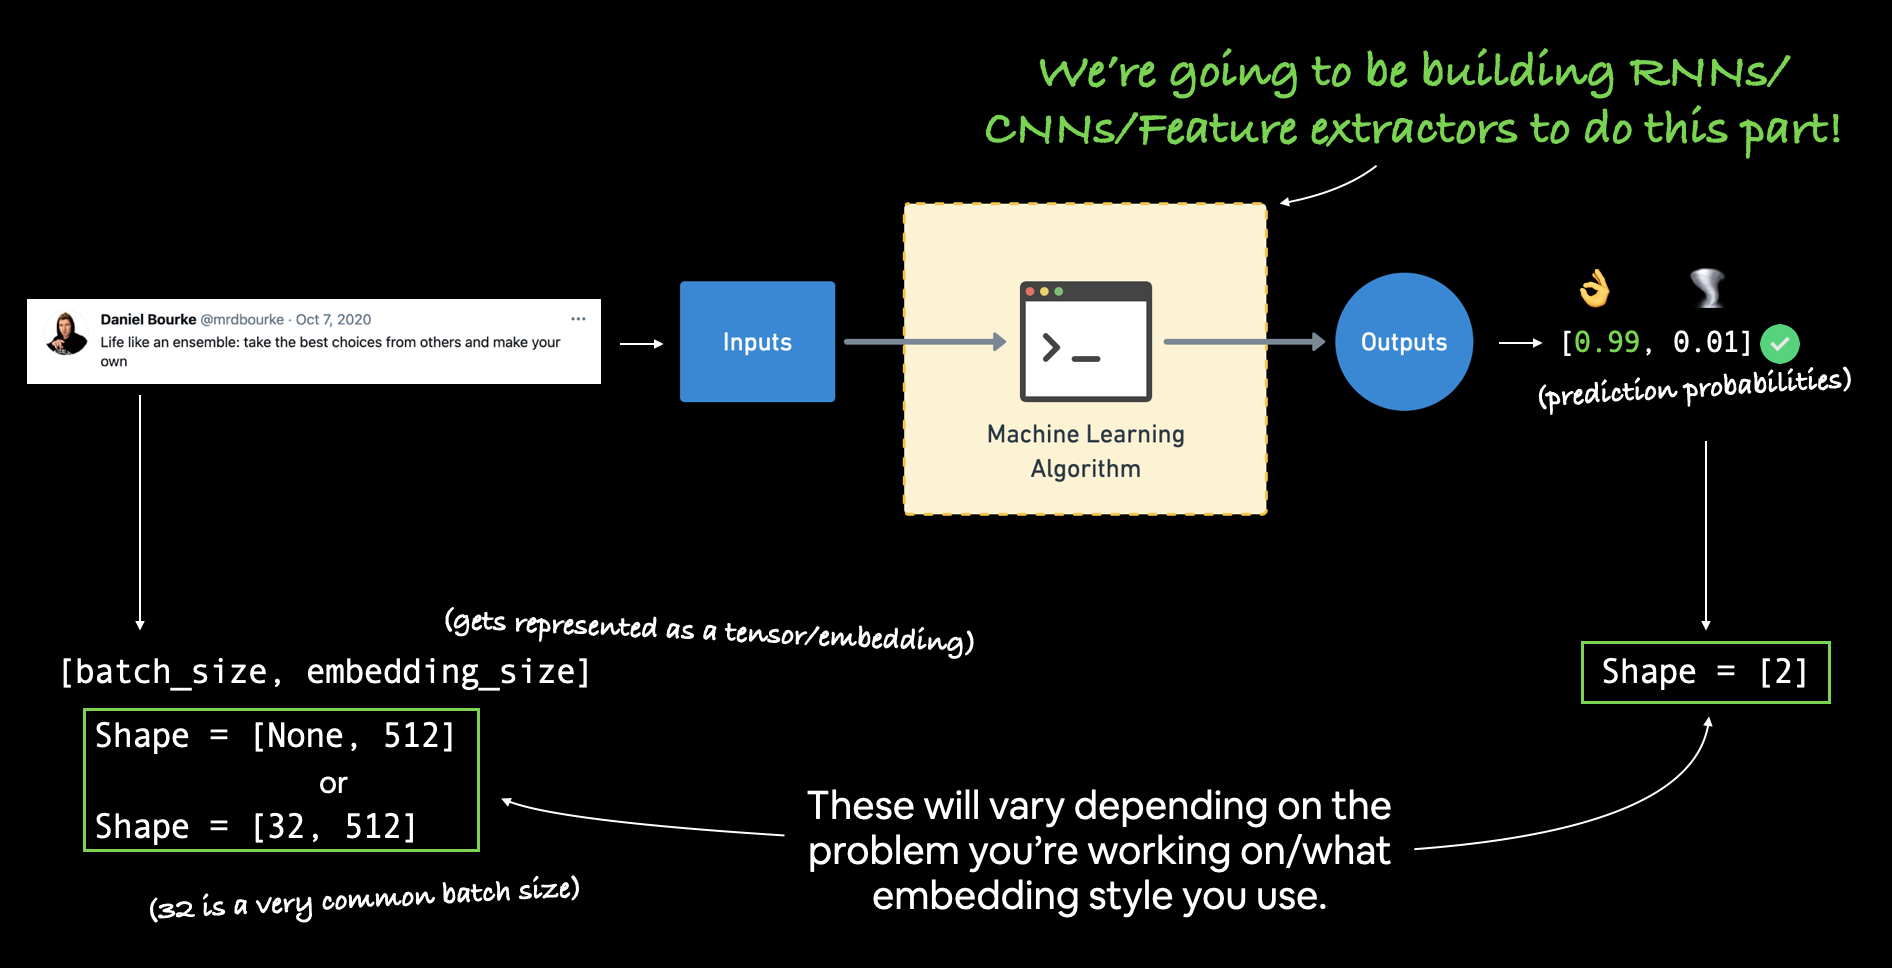

Once you've got your inputs and outputs prepared, it's a matter of figuring out which machine learning model to build in between them to bridge the gap.

Now that we've got a way to turn our text data into numbers, we can start to build machine learning models to model it.

To get plenty of practice, we're going to build a series of different models, each as its own experiment. We'll then compare the results of each model and see which one performed best.

More specifically, we'll be building the following:
* Model 0: Naive Bayes (baseline)
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model
* Model 3: GRU model
* Model 4: Bidirectional-LSTM model
* Model 5: 1D Convolutional Neural Network
* Model 6: TensorFlow Hub Pretrained Feature Extractor
* Model 7: Same as model 6 with 10% of training data

Model 0 is the simplest to acquire a baseline which we'll expect each other of the other deeper models to beat.

Each experiment will go through the following steps:

* Construct the model
* Train the model
* Make predictions with the model
* Track prediction evaluation metrics for later comparison



###Model 0: Getting a baseline

As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we'll create a Scikit-Learn Pipeline using the TF-IDF (term frequency-inverse document frequency) formula to convert our words to numbers and then model them with the Multinomial Naive Bayes algorithm. This was chosen via referring to the [Scikit-Learn machine learning map.](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

[Multinomial Navtive Base Alogrtihem](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                  ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                 ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [26]:
baseline_score = model_0.score(val_sentences,val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")


Our baseline model achieves an accuracy of: 79.27%


In [27]:
#make predication
baseline_predict  = model_0.predict(val_sentences)
baseline_predict[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

###Creating an evaluation function for our model experiments

We could evaluate these as they are but since we're going to be evaluating several models in the same way going forward, let's create a helper function which takes an array of predictions and ground truth labels and computes the following:

* Accuracy
* Precision
* Recall
* F1-score

In [28]:
 # Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [29]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_predict)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 1: A simple dense model
The first "deep" model we're going to build is a single layer dense model. In fact, it's barely going to have a single layer.

It'll take our text and labels as input, tokenize the text, create an embedding, find the average of the embedding (using Global Average Pooling) and then pass the average through a fully connected layer with one output unit and a sigmoid activation function.

If the previous sentence sounds like a mouthful, it'll make sense when we code it out (remember, if in doubt, code it out).

And since we're going to be building a number of TensorFlow deep learning models, we'll import our create_tensorboard_callback() function from helper_functions.py to keep track of the results of each.

In [30]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [31]:
#Build the model with funcation API
from tensorflow.keras import layers

input = layers.Input(shape=(1,),dtype = "string")# inputs are 1-dimensional strings
x = text_vectorizer(input)# turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(input,outputs,name = "model_1_dense")


In [32]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
#compile the model
model_1.compile(

                loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"]
)

In [34]:
#FIT THE MODEL
model_1.fit(
    x = train_sentences,
    y = train_labels,
    epochs = 5,
    validation_data = (val_sentences,val_labels),
    callbacks = [create_tensorboard_callback(dir_name=SAVE_DIR,
                                              experiment_name="simple_dense_model")]


)

Saving TensorBoard log files to: model_logs/simple_dense_model/20251226-070917
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6498 - loss: 0.6486 - val_accuracy: 0.7625 - val_loss: 0.5331
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8096 - loss: 0.4684 - val_accuracy: 0.7861 - val_loss: 0.4706
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8521 - loss: 0.3543 - val_accuracy: 0.7913 - val_loss: 0.4571
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8930 - loss: 0.2842 - val_accuracy: 0.7822 - val_loss: 0.4602
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9093 - loss: 0.2436 - val_accuracy: 0.7861 - val_loss: 0.4788


In [35]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [36]:
model_1.evaluate(val_sentences,val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7764 - loss: 0.5114


[0.4788229763507843, 0.7860892415046692]

In [37]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


(762, 1)

In [38]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [39]:
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred = model_1_preds)
model_1_results


{'accuracy': 78.60892388451444,
 'precision': 0.7911704681403405,
 'recall': 0.7860892388451444,
 'f1': 0.7830068921982195}

## Visualizing learned embedding

In [40]:
#Get the volcabuary from text vectorization layers
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab),words_in_vocab[:10
                                   ]

(10000,
 ['',
  '[UNK]',
  np.str_('the'),
  np.str_('a'),
  np.str_('in'),
  np.str_('to'),
  np.str_('of'),
  np.str_('and'),
  np.str_('i'),
  np.str_('is')])

In [41]:
# Get the weight matrix of embedding layer
# (these are the numerical patterns between the text in the training dataset the model has learned)
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


## Recurrent Neural Networks (RNN's)


The premise of an RNN is simple: use information from the past to help you with the future (this is where the term recurrent comes from). In other words, take an input (X) and compute an output (y) based on all previous inputs.

Recurrent neural networks can be used for a number of sequence-based problems:

* One to one: one input, one output, such as image classification.
* One to many: one input, many outputs, such as image captioning (image input, a sequence of text as caption output).
* Many to one: many inputs, one outputs, such as text classification (classifying a Tweet as real diaster or not real diaster).
* Many to many: many inputs, many outputs, such as machine translation (translating English to Spanish) or speech to text (audio wave as input, text as output).


When you come across RNN's in the wild, you'll most likely come across variants of the following:
* Long short-term memory cells (LSTMs).
* Gated recurrent units (GRUs).
* Bidirectional RNN's (passes forward and backward along a sequence, left to right and right to left).


📖 Resources:

* [MIT Deep Learning Lecture on Recurrent Neural Networks](https://youtu.be/SEnXr6v2ifU) - explains the background of recurrent neural networks and introduces LSTMs.
* [The Unreasonable Effectiveness of Recurrent Neural Networks by Andrej Karpathy](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) - demonstrates the power of RNN's with examples generating various sequences.
* [Understanding LSTMs by Chris Olah](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) - an in-depth (and technical) look at the mechanics of the LSTM cell, possibly the most popular RNN building block.

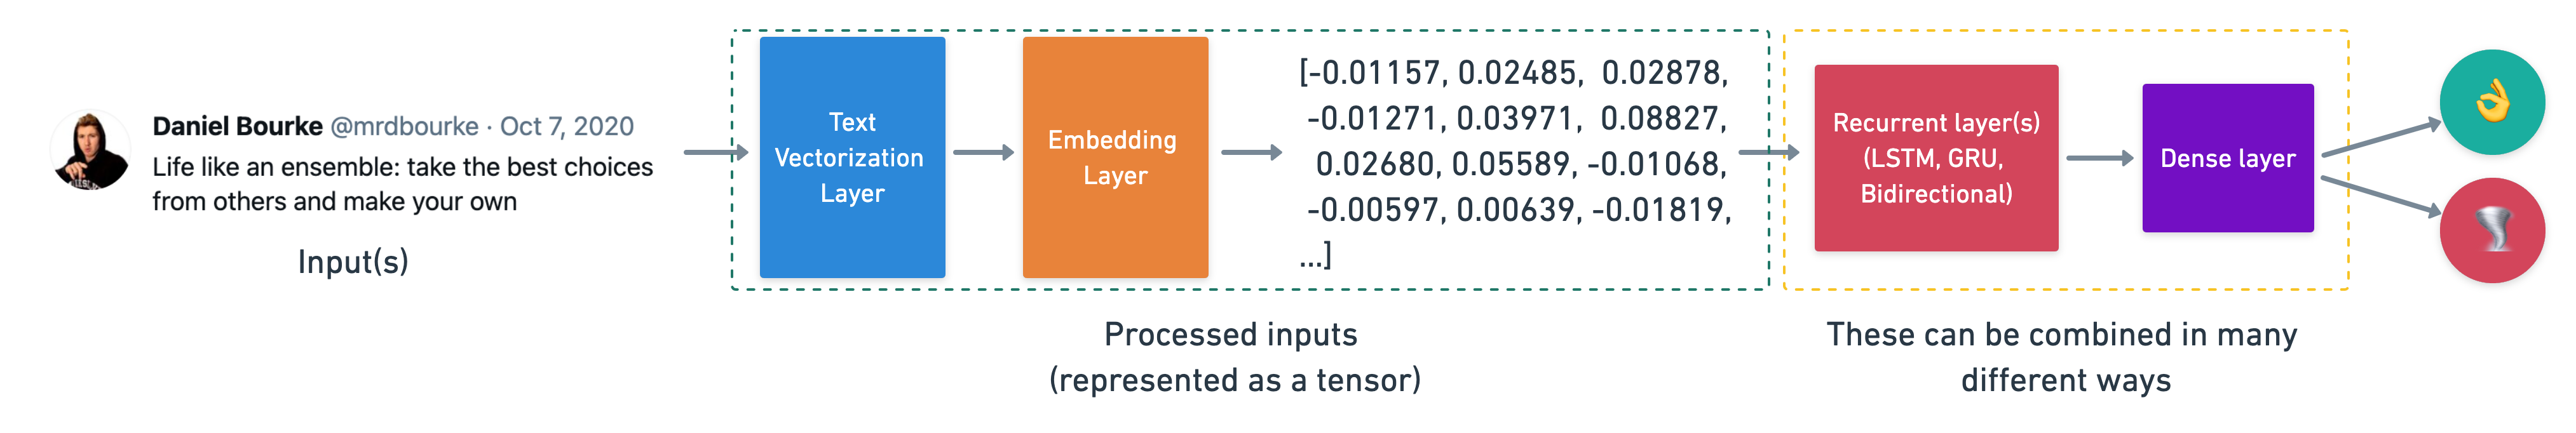

##Model 2: LSTM

To harness the power of the LSTM cell (LSTM cell and LSTM layer are often used interchangably) in TensorFlow, we'll use tensorflow.keras.layers.LSTM().

Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)

The main difference will be that we're going to add an LSTM layer between our embedding and output.

And to make sure we're not getting reusing trained embeddings (this would involve data leakage between models, leading to an uneven comparison later on), we'll create another embedding layer (model_2_embedding) for our model. The text_vectorizer layer can be reused since it doesn't get updated during training.

In [42]:
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [43]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [44]:
model_2.summary()


Model: "model_2_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,329,473 (5.07 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20251226-070928
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6772 - loss: 0.5871 - val_accuracy: 0.7835 - val_loss: 0.4573
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8771 - loss: 0.3151 - val_accuracy: 0.7730 - val_loss: 0.5096
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9251 - loss: 0.2121 - val_accuracy: 0.7533 - val_loss: 0.6017
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9490 - loss: 0.1485 - val_accuracy: 0.7493 - val_loss: 0.6793
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9638 - loss: 0.1061 - val_accuracy: 0.7677 - val_loss: 0.7745


In [46]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] #

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


((762, 1),
 array([[0.00977431],
        [0.8993906 ],
        [0.99846053],
        [0.0493223 ],
        [0.00711733],
        [0.9987908 ],
        [0.67032313],
        [0.99931204],
        [0.997246  ],
        [0.08368762]], dtype=float32))

In [47]:

# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [48]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 76.77165354330708,
 'precision': 0.7728082467063048,
 'recall': 0.7677165354330708,
 'f1': 0.7640397265358128}

##Model 3: GRU
Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.

The architecture of the GRU-powered model will follow the same structure we've been using:

Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)


In [49]:
#Build RNN with GRU
from tensorflow.keras import layers

input = layers.Input(shape=(1, ),dtype ="string")
x = text_vectorizer(input)
x = embedding(x)
x = layers.GRU(64)(x)

output = layers.Dense(1,activation="sigmoid")(x)
model_3 = tf.keras.Model(input,output,name = "model_3_GRU")


In [50]:
model_3.summary()

Model: "model_3_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,317,313 (5.03 MB)

 Trainable params: 1,317,313 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
#compile model
model_3.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [52]:
#fit the model
model_3_history = model_3.fit(
    train_sentences,
    train_labels,
    epochs = 5,
    validation_data = (val_sentences,val_labels),
    callbacks = [create_tensorboard_callback(SAVE_DIR,"GRU")]

)

Saving TensorBoard log files to: model_logs/GRU/20251226-070939
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8491 - loss: 0.3400 - val_accuracy: 0.7822 - val_loss: 0.5398
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9444 - loss: 0.1549 - val_accuracy: 0.7795 - val_loss: 0.6438
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9520 - loss: 0.1408 - val_accuracy: 0.7717 - val_loss: 0.6594
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9580 - loss: 0.1078 - val_accuracy: 0.7717 - val_loss: 0.7506
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9695 - loss: 0.0810 - val_accuracy: 0.7769 - val_loss: 0.8285


In [53]:
#make predict
model_3_pred_prob = model_3.predict(val_sentences)
model_3_pred_prob[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[0.19890788],
       [0.8824193 ],
       [0.9998348 ],
       [0.01705386],
       [0.00130846],
       [0.99790525],
       [0.94363534],
       [0.99990666],
       [0.9997427 ],
       [0.1951238 ]], dtype=float32)

In [54]:
#convert model to labels
modle_3_sequeez = tf.squeeze(tf.round(model_3_pred_prob))
modle_3_sequeez[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [55]:
#calcuate model 3
model_3_result = calculate_results(val_labels,modle_3_sequeez)
model_3_result

{'accuracy': 77.69028871391076,
 'precision': 0.7779652793701148,
 'recall': 0.7769028871391076,
 'f1': 0.7752416323647978}

##Model 4 Bidirectonal RNN model

A standard RNN will process a sequence from left to right, where as a bidirectional RNN will process the sequence from left to right and then again from right to left.

TensorFlow helps us out by providing the tensorflow.keras.layers.Bidirectional class. We can use the Bidirectional class to wrap our existing RNNs, instantly making them bidirectional.



In [56]:
# Building a bidirectional neural network

input = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(input)
x = embedding(x)
x = layers.Bidirectional(layers.GRU(64,return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
output = layers.Dense(1,activation="sigmoid")(x)
model_4 = tf.keras.Model(input,output,name = "model_4_bidirectional")

In [57]:
model_4.summary()

Model: "model_4_bidirectional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 15, 128)        │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,453,441 (5.54 MB)

 Trainable params: 1,453,441 (5.54 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
#compile model

model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"]
                )

In [59]:
#fit the model
mode_4_history = model_4.fit(
    train_sentences,
    train_labels,
    epochs = 5,
    validation_data = (val_sentences,val_labels),
    callbacks = [create_tensorboard_callback(SAVE_DIR,"model_4_bidirectional")]

)

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20251226-070950
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9513 - loss: 0.1895 - val_accuracy: 0.7782 - val_loss: 0.7443
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9695 - loss: 0.0823 - val_accuracy: 0.7769 - val_loss: 0.9148
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9755 - loss: 0.0678 - val_accuracy: 0.7730 - val_loss: 1.0169
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9716 - loss: 0.0684 - val_accuracy: 0.7585 - val_loss: 1.1221
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9783 - loss: 0.0521 - val_accuracy: 0.7717 - val_loss: 1.3102


In [60]:
mode_4_ped_pro = model_4.predict(val_sentences)
mode_4_ped_pro[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


array([[5.6816533e-04],
       [7.3461360e-01],
       [9.9998820e-01],
       [1.2398077e-01],
       [1.6614202e-04],
       [9.9967897e-01],
       [9.9856228e-01],
       [9.9999452e-01],
       [9.9998784e-01],
       [9.5555216e-01]], dtype=float32)

In [61]:
#convert model to labels
modle_4_sequeez = tf.squeeze(tf.round(mode_4_ped_pro))
modle_4_sequeez[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [62]:
#calcuate model 4
model_4_result = calculate_results(val_labels,modle_4_sequeez)
model_4_result

{'accuracy': 77.16535433070865,
 'precision': 0.773049502603257,
 'recall': 0.7716535433070866,
 'f1': 0.7697096359746837}

##Convolutional Neural Networks for Text
You might've used convolutional neural networks (CNNs) for images before but they can also be used for sequences.

The main difference between using CNNs for images and sequences is the shape of the data. Images come in 2-dimensions (height x width) where as sequences are often 1-dimensional (a string of text).

So to use CNNs with sequences, we use a 1-dimensional convolution instead of a 2-dimensional convolution.

A typical CNN architecture for sequences will look like the following:

Inputs (text) -> Tokenization -> Embedding -> Layers (typically Conv1D + pooling) -> Outputs (class probabilities)


###Model 5 : Conv1D

In [63]:
# Test out the embedding, 1D convolutional and max pooling

embedding_test_text = embedding(text_vectorizer("This is test"))# turn target sentence into embedding

# Add a batch dimension to embedding_test_text to make it compatible with Conv1D
embedding_test_text_expanded = tf.expand_dims(embedding_test_text, axis=0)

conv_1D = layers.Conv1D(
                        filters=64,
                        kernel_size = 5, #this is also refeered to as an ngram of 5 (mean its took 5 word at time)
                        strides = 1,
                        activation = "relu",
                        padding = "same"
                        )
conv_1d_output = conv_1D(embedding_test_text_expanded)# pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)# get the most important features

In [64]:
#create  1-dimanestion convoluation layers to model sequence

input = layers.Input((1,),dtype ="string")
x = text_vectorizer(input)
x = embedding(x)
x = layers.Conv1D(filters=64,kernel_size = 5, strides = 1, activation = "relu", padding = "same")(x)
x = layers.GlobalMaxPool1D()(x) # Corrected: Removed unnecessary tf.expand_dims
output = layers.Dense(1,activation="sigmoid")(x)
model_5 = tf.keras.Model(input,output,name = "model_5_convD")


#compile
model_5.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"]
                )



In [65]:
#fit the model

model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences,val_labels),
                              callbacks =  [create_tensorboard_callback(SAVE_DIR,"model_4_bidirectional")]

                              )

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20251226-071010
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9520 - loss: 0.1772 - val_accuracy: 0.7835 - val_loss: 0.8466
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9737 - loss: 0.0722 - val_accuracy: 0.7782 - val_loss: 0.9472
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9771 - loss: 0.0593 - val_accuracy: 0.7651 - val_loss: 1.0496
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9773 - loss: 0.0589 - val_accuracy: 0.7717 - val_loss: 1.0775
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9796 - loss: 0.0493 - val_accuracy: 0.7703 - val_loss: 1.1022


In [66]:
mode_5_ped_pro = model_5.predict(val_sentences)
mode_5_ped_pro[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[1.6782226e-01],
       [6.7476887e-01],
       [9.9993753e-01],
       [9.2665687e-02],
       [8.4041931e-06],
       [9.9333692e-01],
       [8.4591728e-01],
       [9.9996233e-01],
       [9.9999928e-01],
       [8.7285817e-01]], dtype=float32)

In [67]:
#convert model to labels
modle_5_sequeez = tf.squeeze(tf.round(mode_5_ped_pro))
modle_5_sequeez[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [68]:
#calcuate model 5
model_5_result = calculate_results(val_labels,modle_5_sequeez)
model_5_result

{'accuracy': 77.03412073490814,
 'precision': 0.770394799562429,
 'recall': 0.7703412073490814,
 'f1': 0.7692343337606363}

## Model 6: TensorFlow Hub Pretrained Sentence Encoder

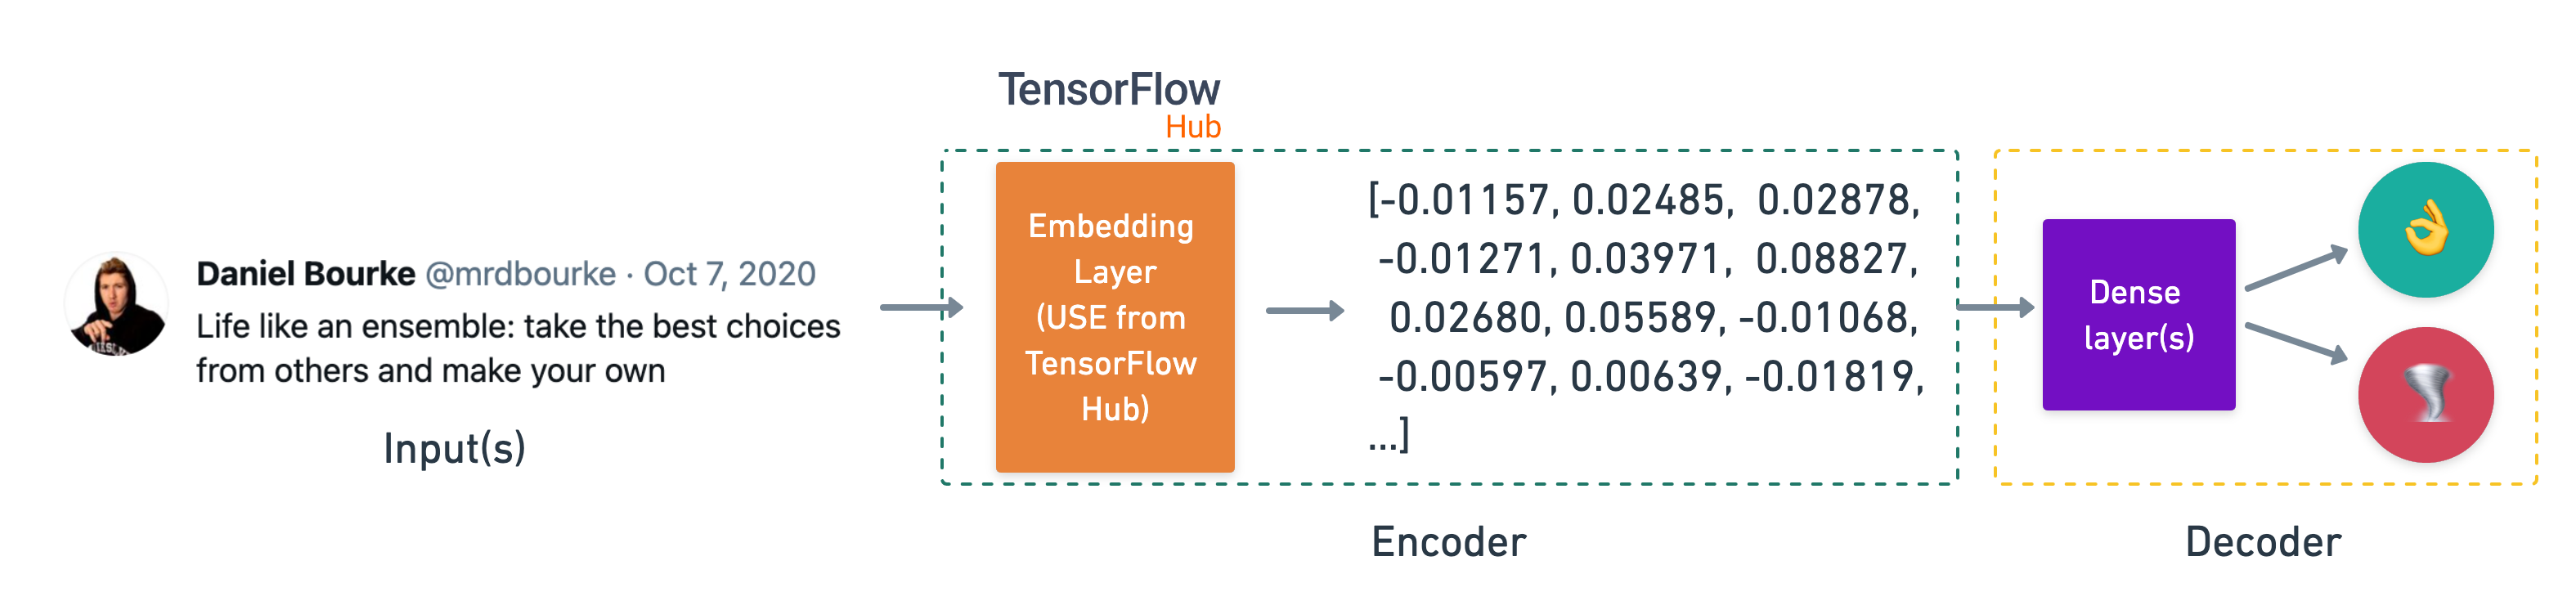

The main difference between the embedding layer we created and the Universal Sentence Encoder is that rather than create a word-level embedding, the Universal Sentence Encoder, as you might've guessed, creates a whole sentence-level embedding.

Our embedding layer also outputs an a 128 dimensional vector for each word, where as, the Universal Sentence Encoder outputs a 512 dimensional vector for each sentence.

*The feature extractor model we're building through the eyes of an encoder/decoder model*

In [69]:
import tensorflow_hub as hub

sample_embed = "There is fload in my street"

embed =  hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2")
embed_sentnece = embed([sample_embed,
                        "When you call the universal sentence encoder on a sentence, it turns it into numbers."
                        ])
print(embed_sentnece[0][:50])


tf.Tensor(
[-0.00199414  0.05470094 -0.00694499  0.02069527  0.05118846  0.03704806
  0.02226025  0.01508929 -0.00841553 -0.06507101 -0.01481024  0.00618517
  0.0621621   0.12818626  0.03083432 -0.05507064 -0.01829205 -0.06464107
 -0.00838296 -0.08474443 -0.02083127 -0.00527005  0.02549083 -0.03859562
 -0.0317094  -0.01016799  0.02267739 -0.01659958 -0.01557761  0.06185247
 -0.00167573  0.02314091  0.04826586  0.0195535   0.03019157 -0.06579417
  0.01777767  0.0496549  -0.0557124  -0.09240884  0.01888364  0.0433347
 -0.02646023  0.08948587 -0.09368979 -0.0609288  -0.04909753 -0.05623794
  0.04349794  0.00416948], shape=(50,), dtype=float32)


In [70]:
embed_sentnece[0].shape

TensorShape([512])

In [71]:

# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [72]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, Input, Model

# Define a custom layer to wrap the hub.KerasLayer
class CustomUniversalSentenceEncoder(layers.Layer):
    def __init__(self, trainable=False, name="USE", **kwargs):
        super().__init__(**kwargs)
        self.sentence_encoder_layer = hub.KerasLayer(
            "https://tfhub.dev/google/universal-sentence-encoder/4",
            trainable=trainable,
            name=name
        )

    def call(self, inputs):
        return self.sentence_encoder_layer(inputs)

# Instantiate the custom USE layer
sentence_encoder_layer = CustomUniversalSentenceEncoder(trainable=False, name="USE")

# Define the explicit string input
inputs = Input(shape=(), dtype=tf.string, name="input_sentences")

# Pass inputs to the custom USE layer
outputs = sentence_encoder_layer(inputs)

# Add the dense output layer
outputs = layers.Dense(1, activation="sigmoid")(outputs)

# Create the functional model
model_6 = Model(inputs=inputs, outputs=outputs, name="model_6_USE")

model_6.summary()

Model: "model_6_USE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_sentences (InputLayer)    │ (None)                 │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_universal_sentence_enco… │ (None, 512)            │             0 │
│ (CustomUniversalSentenceEncode… │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
#compile
model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"]
                )

In [74]:
# Re-compile the model with jit_compile=False to avoid XLA issues with string inputs
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"],
                jit_compile=False # Disable XLA compilation
                )

model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs  = 5,
                              validation_data = (val_sentences,val_labels)
                              )

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6417 - loss: 0.6733 - val_accuracy: 0.7743 - val_loss: 0.6161
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7887 - loss: 0.5963 - val_accuracy: 0.7835 - val_loss: 0.5655
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7886 - loss: 0.5537 - val_accuracy: 0.7808 - val_loss: 0.5326
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7969 - loss: 0.5165 - val_accuracy: 0.7808 - val_loss: 0.5112
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8081 - loss: 0.4899 - val_accuracy: 0.7874 - val_loss: 0.4965


In [75]:
model_6.pred_prob = model_6.predict(val_sentences)
model_6.pred_prob [:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


array([[0.36198285],
       [0.6664942 ],
       [0.8536965 ],
       [0.35186276],
       [0.65231687],
       [0.7321023 ],
       [0.81925315],
       [0.83952504],
       [0.7500536 ],
       [0.20262945]], dtype=float32)

In [76]:
#convert predication into labels
modle_6_sequeez = tf.squeeze(tf.round(model_6.pred_prob))
modle_6_sequeez[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [77]:
#calculate model 6
model_6_results = calculate_results(val_labels,modle_6_sequeez)
model_6_results

{'accuracy': 78.74015748031496,
 'precision': 0.7880676688901149,
 'recall': 0.7874015748031497,
 'f1': 0.786134874994391}

In [78]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [79]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_result,
                                  "bidirectional": model_4_result,
                                  "conv1d": model_5_result,
                                  "tf_hub_sentence_encoder": model_6_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.608924,0.791170,0.786089,0.783007
lstm,76.771654,0.772808,0.767717,0.764040
gru,77.690289,0.777965,0.776903,0.775242
bidirectional,77.165354,0.773050,0.771654,0.769710
conv1d,77.034121,0.770395,0.770341,0.769234
tf_hub_sentence_encoder,78.740157,0.788068,0.787402,0.786135


In [80]:

# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

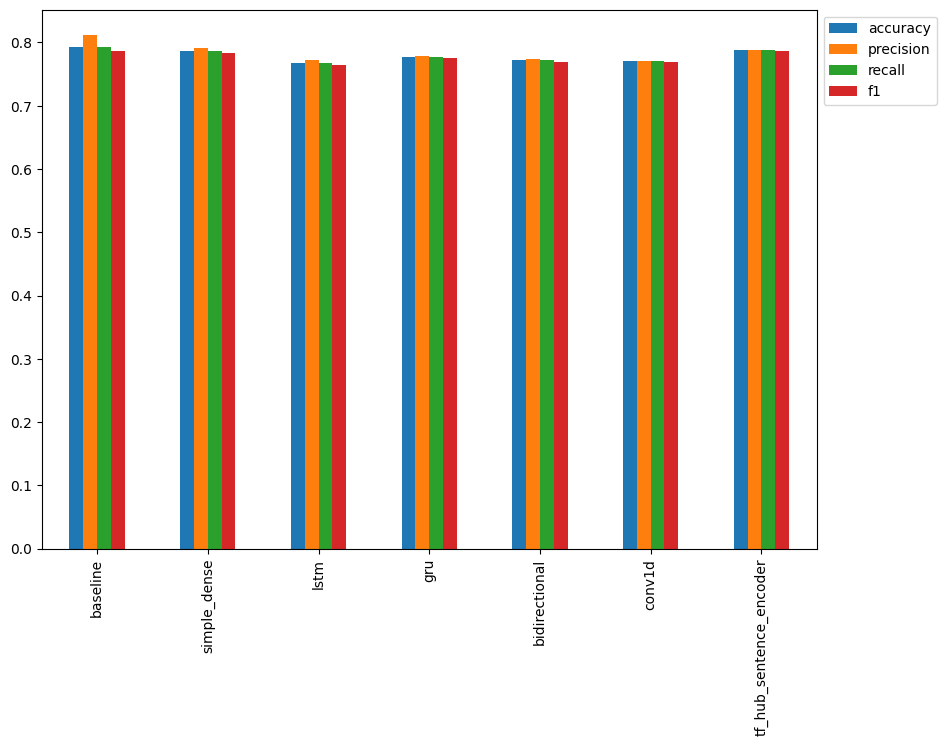

In [81]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

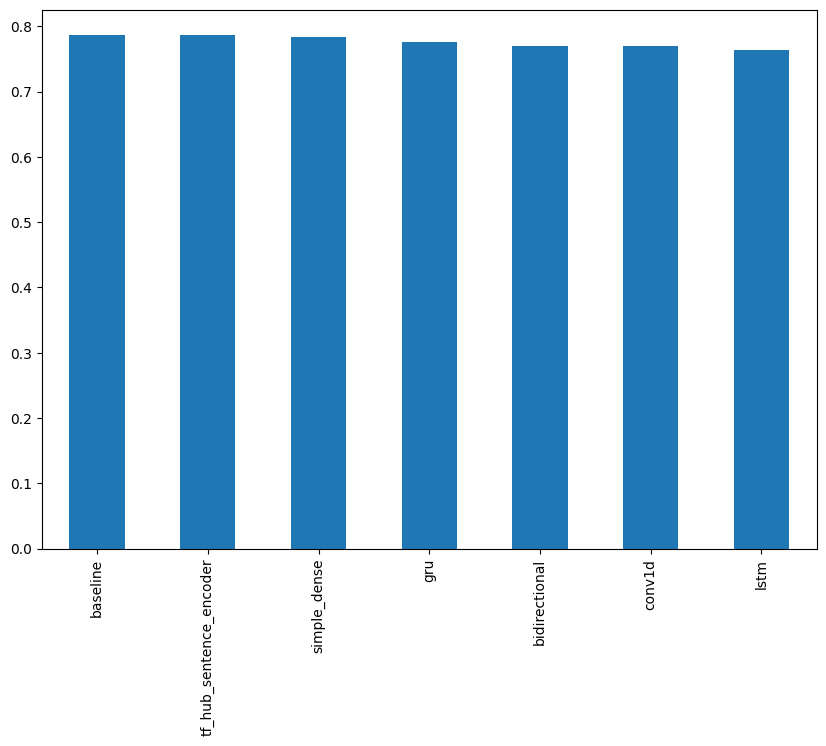

In [82]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

###Combining our models (model ensembling/stacking)
Many production systems use an ensemble (multiple different models combined) of models to make a prediction.

The idea behind model stacking is that if several uncorrelated models agree on a prediction, then the prediction must be more robust than a prediction made by a singular model.

The keyword in the sentence above is uncorrelated, which is another way of saying, different types of models. For example, in our case, we might combine our baseline, our bidirectional model and our TensorFlow Hub USE model.

Although these models are all trained on the same data, they all have a different way of finding patterns.

If we were to use three similarly trained models, such as three LSTM models, the predictions they output will likely be very similar.

Think of it as trying to decide where to eat with your friends. If you all have similar tastes, you'll probably all pick the same restaurant. But if you've all got different tastes and still end up picking the same restaurant, the restaurant must be good.

Since we're working with a classification problem, there are a few of ways we can combine our models:

* Averaging - Take the output prediction probabilities of each model for each sample, combine them and then average them.
* Majority vote (mode) - Make class predictions with each of your models on all samples, the predicted class is the one in majority. For example, if three different models predict [1, 0, 1] respectively, the majority class is 1, therefore, that would be the predicted label.
* Model stacking - Take the outputs of each of your chosen models and use them as inputs to another model.


[Machin Learning Engineer](https://www.mlebook.com/wiki/doku.php)📖 Resource: The above methods for model stacking/ensembling were adapted from Chapter 6 of the Machine Learning Engineering Book by Andriy Burkov. If you're looking to enter the field of machine learning engineering, not only building models but production-scale machine learning systems,

Again, the concept of model stacking is best seen in action.

We're going to combine our baseline model (model_0), LSTM model (model_1) and our USE model trained on the full training data (model_6) by averaging the combined prediction probabilities of each.

In [83]:
# Get mean pred probs for 3 models
import numpy as np
base_line_pred_prob = np.max(model_0.predict_proba(val_sentences), axis=1)
combined_pred_probs = base_line_pred_prob + tf.squeeze(model_1_pred_probs, axis=1) + tf.squeeze(model_6.pred_prob)
combined_preds = tf.round(combined_pred_probs/3) # average and round the prediction probabilities to get prediction classes
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [84]:
# Calculate results from averaging the prediction probabilities
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'accuracy': 79.00262467191601,
 'precision': 0.7905381935743115,
 'recall': 0.7900262467191601,
 'f1': 0.7901950171971297}

In [85]:
# Add our combined model's results to the results DataFrame
all_model_results.loc["ensemble_results"] = ensemble_results

In [86]:
# Convert the accuracy to the same scale as the rest of the results
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100

/tmp/ipython-input-3504904892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100


In [87]:
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.786089,0.791170,0.786089,0.783007
lstm,0.767717,0.772808,0.767717,0.764040
gru,0.776903,0.777965,0.776903,0.775242
bidirectional,0.771654,0.773050,0.771654,0.769710
conv1d,0.770341,0.770395,0.770341,0.769234
tf_hub_sentence_encoder,0.787402,0.788068,0.787402,0.786135
ensemble_results,79.002625,0.790538,0.790026,0.790195


###Saving and loading a trained model
Although training time didn't take very long, it's good practice to save your trained models to avoid having to retrain them.

Saving your models also enables you to export them for use elsewhere outside of your notebooks, such as in a web application.

There are two main ways of saving a model in TensorFlow:

* The HDF5 format.
* The SavedModel format (default).


Let's take a look at both.

In [88]:
# Save TF Hub Sentence Encoder model to the recommended Keras format
#import tensorflow_hub as hub
#load_model_6 = tf.keras.models.load_model("model_6.h5",custom_objects={"KerasLayers":hub.KerasLayer})



In [93]:
##Save model
model_5.save("model_5_savemodel_formate.keras")

In [94]:
loaded_model_5_savemodel_formate = tf.keras.models.load_model("model_5_savemodel_formate.keras")

In [95]:
loaded_model_5_savemodel_formate.evaluate(val_sentences,val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7388 - loss: 1.2580


[1.1021559238433838, 0.7703412175178528]